## Метрики моделей классификации 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
from IPython.display import display
from sklearn.datasets import load_iris

iris_dataset=load_iris()
print("Ключи load_dataset:\n", iris_dataset.keys())

Ключи load_dataset:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [10]:
print("Ключи feature_names:\n", iris_dataset['feature_names'])
print("Ключи data:\n", iris_dataset['data'])

Ключи feature_names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Ключи data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.

In [18]:
print("Ключи feature_names:\n", iris_dataset['target'])
print("Ключи data:\n", iris_dataset['target_names'])

Ключи feature_names:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Ключи data:
 ['setosa' 'versicolor' 'virginica']


In [19]:
iris_df=pd.DataFrame(iris_dataset['data'],columns=iris_dataset.feature_names)
display(iris_df.head(5))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
dict_class=dict(zip(range(3),iris_dataset['target_names']))
df_full=pd.concat([pd.DataFrame(iris_dataset['target'],columns=['class']), 
                   iris_df], axis=1).replace({'class': dict_class})
df_full.head()

,class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


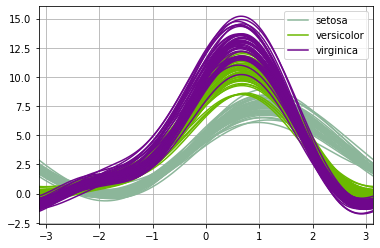

In [21]:
pd_plt.andrews_curves(df_full, 'class')
plt.show()

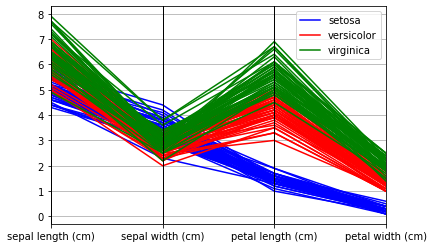

In [22]:
pd_plt.parallel_coordinates(df_full, 'class',colormap=plt_colors.ListedColormap(['blue','red', 'green']))
plt.show()

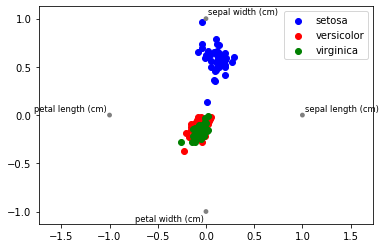

In [24]:
pd_plt.radviz(df_full, 'class', colormap=plt_colors.ListedColormap(['blue','red', 'green']))
plt.show()

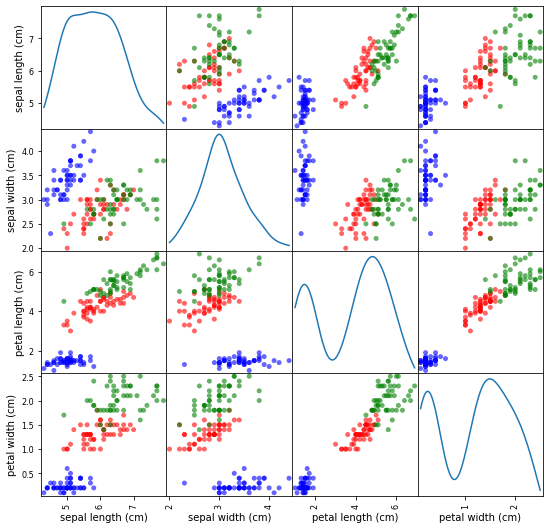

In [25]:
pd_plt.scatter_matrix(df_full,  #данные 
                     c=pd.factorize(df_full['class'])[0], # разделение по цветам
                     alpha=0.6, # прозрачность
                     s=100, # размер точек
                     figsize=(9, 9), # размер окна
                     diagonal='kde', # что на диагонали плотность  kde или hist  
                     #hist_kwds={'bins': 20}, # гистограмма настраиваемая диаграмма на диагонале
                     cmap=plt_colors.ListedColormap(['blue','red', 'green'])# список цветов
                    )
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=12)

In [27]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)

X_train (112, 4)
y_train (112,)


In [28]:
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_test (38, 4)
y_test (38,)


In [29]:
y_train

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 1, 1, 2, 0,
       2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 2, 1, 0, 2, 2, 1, 2,
       2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 0, 2, 0, 0,
       1, 2, 2, 1, 2, 2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2,
       2, 1])

In [30]:
y_test

array([0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1])

### Предсказание

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=2)

knk=KNeighborsClassifier()
knk.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
y_pred=knk.predict(X_test)
print('Правильность на тестовом наборе: {:.3f}'.format(np.mean(y_pred==y_test)))

Правильность на тестовом наборе: 1.000


In [33]:
knk_train=knk.score(X_train , y_train)
knk_test=knk.score(X_test , y_test)
print("тренировочный: {:.3f}".format(knk_train))
print("тестовый: {:.3f}".format(knk_test))

тренировочный: 0.955
тестовый: 1.000


### Кросс-валидация

In [48]:
from sklearn.model_selection import cross_val_score 


knk = KNeighborsClassifier()
cross_vall = cross_val_score(knk, iris_dataset.data, iris_dataset.target, cv=50)

np.set_printoptions(precision=4)
print("Значения правильности перекрестной проверки:",cross_vall)


Значения правильности перекрестной проверки: [1.     1.     1.     1.     1.     1.     0.6667 1.     1.     1.
 1.     1.     1.     1.     1.     1.     1.     1.     1.     0.6667
 0.6667 1.     0.6667 1.     1.     1.     1.     1.     1.     1.
 1.     1.     1.     0.6667 1.     1.     1.     1.     1.     1.
 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.    ]


In [43]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold


knk = KNeighborsClassifier()
split = KFold(n_splits=3)
cross_vall = cross_val_score(knk, iris_dataset.data, iris_dataset.target, cv=split)

np.set_printoptions(precision=4)
print("Значения правильности перекрестной проверки:",cross_vall)

Значения правильности перекрестной проверки: [0. 0. 0.]


In [21]:
from sklearn.model_selection import ShuffleSplit

knk = KNeighborsClassifier()
shuffle_split = ShuffleSplit(test_size=.3, train_size=.6, n_splits=5, random_state=12)

cross_vall = cross_val_score(knk, iris_dataset.data, iris_dataset.target, cv=shuffle_split)

np.set_printoptions(precision=4)
print("Значения правильности перекрестной проверки:",cross_vall)

Значения правильности перекрестной проверки: [0.9778 0.9556 0.9778 0.9556 0.9556]


In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

for n_neighbors in [1,2,3,4,5,6]:
    knk = KNeighborsClassifier(n_neighbors=n_neighbors)
    strat_shuffle_split = StratifiedShuffleSplit(test_size=.3, train_size=.6, n_splits=10, random_state=12)

    cross_vall = cross_val_score(knk, iris_dataset.data, iris_dataset.target, cv=strat_shuffle_split)

    np.set_printoptions(precision=4)
    print("Значения правильности перекрестной проверки:",cross_vall)
    print("Среднее:",np.mean(cross_vall))
    print("MSE:",np.std(cross_vall))

Значения правильности перекрестной проверки: [0.9111 0.9778 0.9556 0.9778 0.9778 0.9778 0.9556 0.9778 0.9556 0.8889]
Среднее: 0.9555555555555555
MSE: 0.0298142396999972
Значения правильности перекрестной проверки: [0.9111 0.9778 0.9111 0.9556 0.9778 0.9778 0.9333 0.9556 0.9556 0.8889]
Среднее: 0.9444444444444444
MSE: 0.030225490019412105
Значения правильности перекрестной проверки: [0.9111 0.9778 0.9778 0.9778 0.9778 0.9778 0.9778 0.9556 0.9778 0.9333]
Среднее: 0.9644444444444444
MSE: 0.022662308949301255
Значения правильности перекрестной проверки: [0.9333 0.9778 0.9333 1.     0.9556 0.9778 0.9778 0.9333 0.9556 0.9111]
Среднее: 0.9555555555555555
MSE: 0.026293687924887173
Значения правильности перекрестной проверки: [0.9333 0.9778 0.9556 0.9778 0.9778 0.9778 0.9778 0.9556 0.9778 0.9556]
Среднее: 0.9666666666666666
MSE: 0.01490711984999857
Значения правильности перекрестной проверки: [0.9333 0.9778 0.9111 1.     0.9778 0.9778 0.9778 0.9556 1.     0.9111]
Среднее: 0.9622222222222222
MSE